# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [49]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Read the data using pandas
df = pd.read_csv('train.csv')

In [51]:
# View first 5 rows
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [52]:
# View info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [53]:
# Based on the above, we know there are 333 rows and 15 columns in the dataset. 
# There does not appear to be any missing data as all columns appear to have 333 values. 
# All data is numeric (type int or float)

In [54]:
# Renaming columns to make it easier to follow
df = df.rename(columns = {'crim': 'crime_rate', 
                          'zn' : 'residential_zone',
                          'indus': 'industrial_zone',
                          'chas' : 'borders_river',
                          'nox' : 'NOx_concentration',
                          'rm' : 'average_rooms',
                          'age' : 'old_units',
                          'dis' : 'dist_to_employmentcentre',
                          'rad' : 'access_to_highway',
                          'tax' : 'property_tax',
                          'ptratio' : 'pupil_teacher_ratio',
                          'b' : 'african_american_pop',
                          'lstat' : 'lower_status_pop',
                          'medv' : 'home_med_value'
                         })

In [55]:
# View summary statistics using describe()
df.describe()

,ID,crime_rate,residential_zone,industrial_zone,borders_river,NOx_concentration,average_rooms,old_units,dist_to_employmentcentre,access_to_highway,property_tax,pupil_teacher_ratio,african_american_pop,lower_status_pop,home_med_value
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


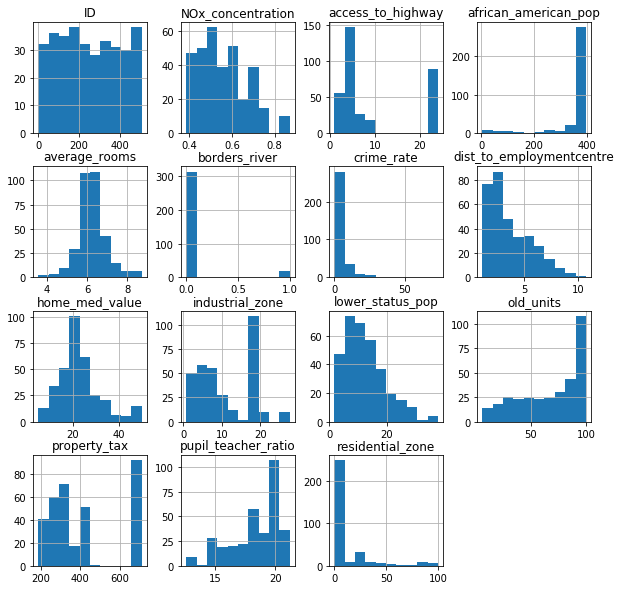

In [56]:
# And some plots! Let's use histograms to get a feel for the distribution of the data
df.hist(figsize = (10,10));

In [96]:
# Plot a correlation matrix (measures the linear relationship between variables)
correlation_matrix = df.corr().round(2)
correlation_matrix
plt.figure(figsize = (14,14))
correlation_matrix.style.background_gradient(cmap='coolwarm', axis = None)

,ID,crime_rate,residential_zone,industrial_zone,borders_river,NOx_concentration,average_rooms,old_units,dist_to_employmentcentre,access_to_highway,property_tax,pupil_teacher_ratio,african_american_pop,lower_status_pop,home_med_value
ID,1,0.46,-0.16,0.42,0.01,0.44,-0.11,0.26,-0.36,0.71,0.69,0.31,-0.27,0.28,-0.22
crime_rate,0.46,1,-0.21,0.42,-0.04,0.46,-0.31,0.38,-0.4,0.67,0.62,0.31,-0.48,0.53,-0.41
residential_zone,-0.16,-0.21,1,-0.52,-0.02,-0.5,0.33,-0.54,0.64,-0.3,-0.31,-0.38,0.17,-0.39,0.34
industrial_zone,0.42,0.42,-0.52,1,0.04,0.75,-0.44,0.64,-0.7,0.57,0.71,0.39,-0.34,0.61,-0.47
borders_river,0.01,-0.04,-0.02,0.04,1,0.08,0.11,0.07,-0.08,0.01,-0.02,-0.13,0.06,-0.05,0.2
NOx_concentration,0.44,0.46,-0.5,0.75,0.08,1,-0.34,0.74,-0.77,0.61,0.67,0.19,-0.37,0.6,-0.41
average_rooms,-0.11,-0.31,0.33,-0.44,0.11,-0.34,1,-0.25,0.27,-0.27,-0.36,-0.37,0.16,-0.62,0.69
old_units,0.26,0.38,-0.54,0.64,0.07,0.74,-0.25,1,-0.76,0.45,0.51,0.26,-0.27,0.59,-0.36
dist_to_employmentcentre,-0.36,-0.4,0.64,-0.7,-0.08,-0.77,0.27,-0.76,1,-0.48,-0.53,-0.23,0.28,-0.51,0.25
access_to_highway,0.71,0.67,-0.3,0.57,0.01,0.61,-0.27,0.45,-0.48,1,0.9,0.47,-0.41,0.48,-0.35


<Figure size 1008x1008 with 0 Axes>

In [77]:
# The correlation matrix shows a value between -1 and 1 depending how correlated two variables are. 

# A value close to -1 means two variables are strongly negatively correlated. 
# For example dist_to_employment centre and NOx_concentration (-0.77).
# We can interpret this as the further we are from an employment centre, the lower the nitrogen oxyde concentration.

# Conversely, a value close to 1 means two variables are strongly positively correlated.
# For example property_tax and access_to_highway (0.9)
# We can interpret this as properties attracting a higher tax threshold due to the favorable location.

# However note that correlation is not causation and other factors may be in play!

In [137]:
# Let's create dataframes for properties next to the Charles river or not
df_charles = df.loc[df['borders_river'] == 1]
df_not_charles = df.loc[df['borders_river'] == 0]

In [153]:
# HYPOTHESIS: Being by the Charles River is attractive (less crime, better access to highway etc.)

In [149]:
# Let's compare the two data subsets' crime rates
print(df_charles['crime_rate'].mean().round(2))
print(df_not_charles['crime_rate'].mean().round(2))

2.16
3.44


In [151]:
# Let's compare the two data subsets' access to highway
print(df_charles['access_to_highway'].mean().round(2))
print(df_not_charles['access_to_highway'].mean().round(2))

9.9
9.62


In [152]:
# Let's compare the two data subsets' house prices
print(df_charles['home_med_value'].mean().round(2))
print(df_not_charles['home_med_value'].mean().round(2))

30.18
22.3


In [ ]:
# Based on the three comparisons above, we can see that the crime rate is lower and access to highway is above average
# for properties by the river. However also note that the house price is considerably higher.

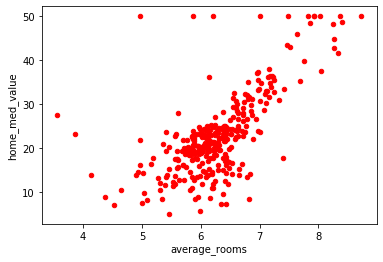

In [141]:
# Let's look at the number of rooms in comparison to the median property value. 
df_roomsanalysis = df[['average_rooms', 'home_med_value']]
df_roomsanalysis.plot('average_rooms', 'home_med_value', kind = 'scatter', c = 'red')

In [143]:
#Analysis: More rooms would imply a larger house and we observe that this matches a higher house price.

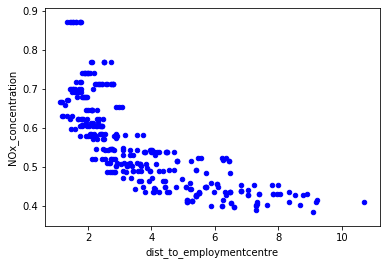

In [142]:
# Let's look at the distance to employment centre in comparison to the nitrogen oxyde concentration.
df_empnox = df [['dist_to_employmentcentre', 'NOx_concentration']]
df_empnox.plot('dist_to_employmentcentre', 'NOx_concentration', kind = 'scatter', c = 'blue')

In [ ]:
# Analysis: The Nitrogen oxyde concentration is higher in locations close to employment centres. 
# Would indicate urban areas with a poorer airer quality but access to infrastructure. 

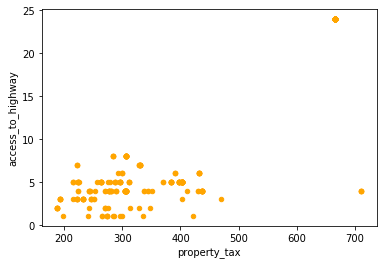

In [158]:
# Let's look at property tax in comparison to access to highway.
df_taxhighway = df [['property_tax', 'access_to_highway']]
df_taxhighway.plot( 'property_tax', 'access_to_highway', kind = 'scatter', c = 'orange')

In [ ]:
# Analysis: Would have expected to see clearer correlation where as access to highway improved, 
# the property tax would increase.